In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [181]:
s=pd.read_csv("/content/drive/MyDrive/exo/exo.csv")

In [182]:
s

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [183]:
s=s.dropna()

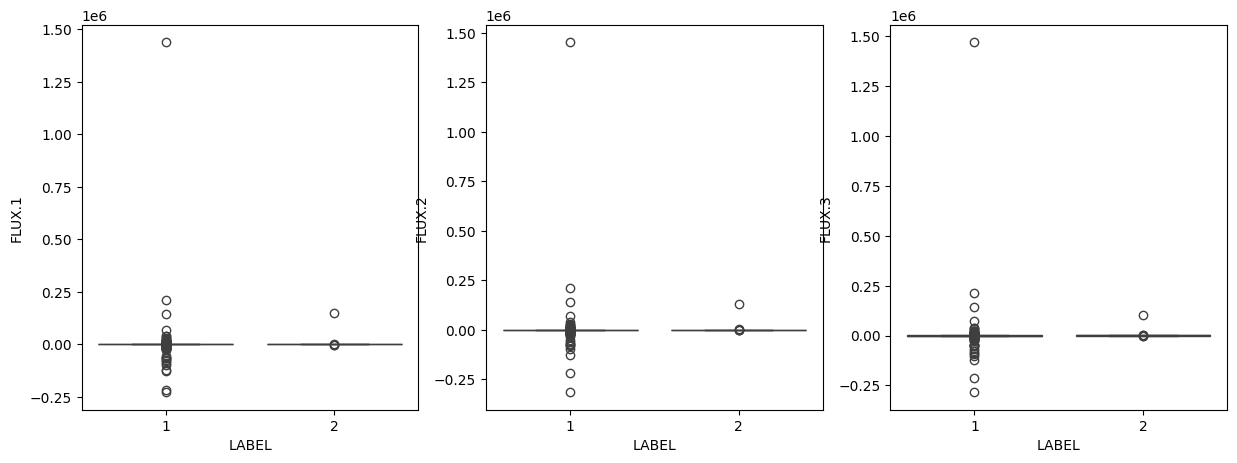

In [184]:
plt.figure(figsize = (20,5))

for i in range(1,4):
    plt.subplot(1,4,i)
    sns.boxplot(data = s, x = "LABEL", y = "FLUX." + str(i))

In [185]:
# Dropping Outliers
indices_to_drop = set()
for column in s.columns:
    indices_to_drop.update(s[s[column] > 0.25e6].index)

# Drop these indices
s.drop(index=indices_to_drop, inplace=True)
s.reset_index(drop=True, inplace=True)

In [187]:
y=s["LABEL"]
X=s.drop("LABEL",axis=1)

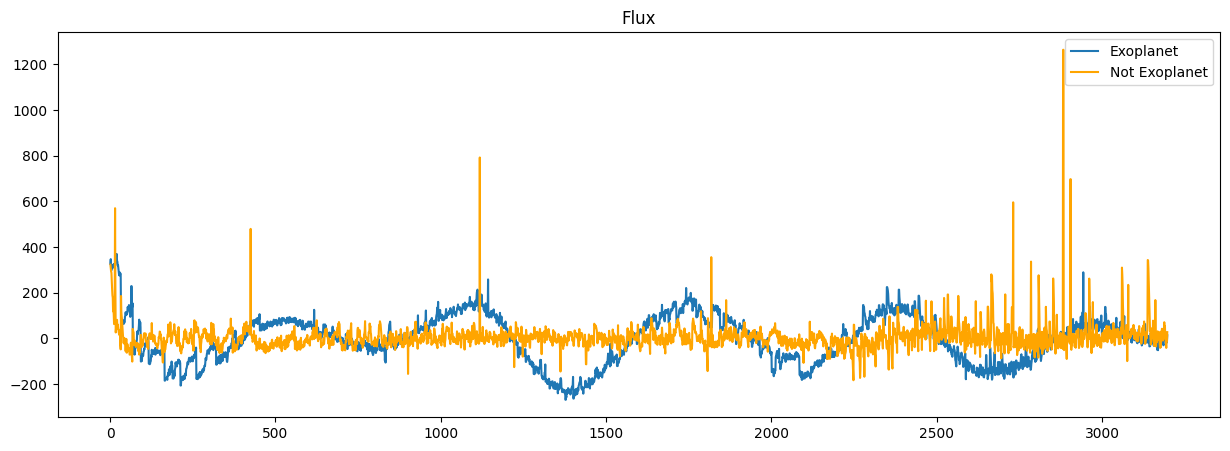

In [221]:
#Flux of an exoplanet VS not an exoplanet
plt.figure(figsize=(15,5))
flux=range(1,X.shape[1]+1)
flux_value_2=X.iloc[3,:]  #exoplanet
flux_value_1=X.iloc[5073,:]   #not an exoplanet
plt.plot(flux,flux_value_2)
plt.plot(flux,flux_value_1, color='orange')
plt.legend(["Exoplanet","Not Exoplanet"])
plt.title("Flux")
plt.show()
#Light dips in the graph

<Axes: title={'center': 'Class Distribution | 1:Not Exoplanet | 2: Exoplanet'}, xlabel='LABEL'>

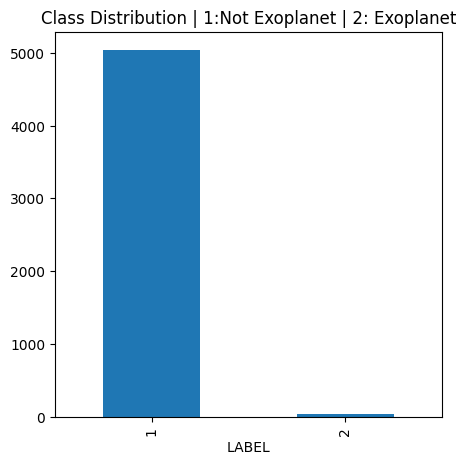

In [189]:
plt.figure(figsize=(5,5))
y.value_counts().plot(kind = "bar", title = "Class Distribution | 1:Not Exoplanet | 2: Exoplanet")

In [190]:
# Create balance in the data
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: title={'center': 'Class Distribution After Sampling| 1:Not Exoplanet | 2: Exoplanet'}, xlabel='LABEL'>

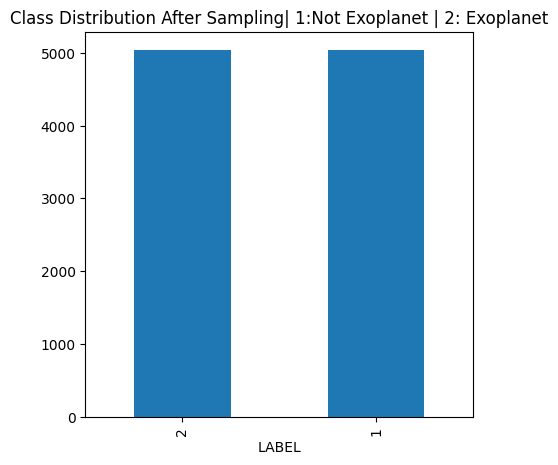

In [191]:
plt.figure(figsize=(5,5))

y_resampled.value_counts().plot(kind = "bar", title = "Class Distribution After Sampling| 1:Not Exoplanet | 2: Exoplanet")

In [192]:
y_resampled.value_counts()

LABEL
2    5037
1    5037
Name: count, dtype: int64

In [195]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [196]:
#Feature Scaling

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = sc.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

Model Training

In [197]:
accuracy_list=[]

Logistic Regression

In [198]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_sc,y_train)

y_pred=model.predict(X_test_sc)


In [199]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8312655086848635
[[979  39]
 [301 696]]


Random Forest

In [200]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_sc,y_train)
y_pred=rf.predict(X_test_sc)

In [201]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.5563275434243177
[[1018    0]
 [ 894  103]]


[[1018    0]
 [ 873  124]]


SVM

In [202]:
svm = SVC()
svm.fit(X_train_sc,y_train)

SVC()

In [203]:
y_pred = svm.predict(X_test_sc)

In [204]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy_score)
print(confusion_matrix(y_test,y_pred))

<function accuracy_score at 0x7db8783ba050>
[[1003   15]
 [ 792  205]]


Decision Tree Classifier

In [205]:
dc = DecisionTreeClassifier(random_state = 0)
dc.fit(X_train_sc,y_train)
y_pred = dc.predict(X_test_sc)
accuracy=accuracy_score(y_test,y_pred)

accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.56575682382134
[[989  29]
 [846 151]]


XG Boost

In [206]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
y_train_adjusted = y_train - 1

xgb_classifier.fit(X_train_sc, y_train_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [212]:

y_test_adjusted = y_test - 1

y_pred = xgb_classifier.predict(X_test_sc)


accuracy=accuracy_score(y_test_adjusted,y_pred)

accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test_adjusted,y_pred))

0.6203473945409429
[[1018    0]
 [ 765  232]]


KNN

In [208]:
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn.fit(X_train_sc,y_train)
y_pred=knn.predict(X_test_sc)

In [209]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy)

0.9330024813895782


In [210]:
print(confusion_matrix(y_test,y_pred))

[[883 135]
 [  0 997]]


In [219]:
df=pd.DataFrame(accuracy_list,columns=["Accuracy"],index=["Logistic Regression","Random Forest",
                                                          "SVM","Decision Tree","XGBoost","KNN"])

df

,Accuracy
Logistic Regression,0.831266
Random Forest,0.556328
SVM,0.599504
Decision Tree,0.565757
XGBoost,0.620347
KNN,0.933002


In [220]:
df.max()

Accuracy    0.933002
dtype: float64